# PennyLane Codebook - Circuits with Many Qubits

# Multi-Qubit Systems

## Codercise-I.11.1-Preparing Basis State

In [17]:
import pennylane as qml
from pennylane import numpy as np

In [18]:
num_wires = 3
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def make_basis_state(basis_id):
    """Produce the 3-qubit basis state corresponding to |basis_id>.

    Note that the system starts in |000>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The computational basis state |basis_id>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE BASIS STATE
    
    n = np.binary_repr(basis_id, width = 3)
    
    if (n[0] == '1'):
        qml.PauliX(0)
    
    if (n[1] == '1'):
        qml.PauliX(1)
    
    if (n[2] == '1'):
        qml.PauliX(2)

    return qml.state()

basis_id = 3
print(f"Output state = {make_basis_state(basis_id)}")

Output state = [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


## Codercise-I.11.2-Separable Operations

In [19]:
# Creates a device with *two* qubits
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def two_qubit_circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |+>|1>
    qml.Hadamard(0)
    qml.PauliX(1)

    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT
    return qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(1))


print(two_qubit_circuit())

(tensor(0., requires_grad=True), tensor(-1., requires_grad=True))


## Codercise-I.11.3-Expectation Value of Two-Qubit Observable

In [20]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def create_one_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |1>|->
    qml.PauliX(0)
    qml.PauliX(1)
    qml.Hadamard(1)

    # RETURN A SINGLE EXPECTATION VALUE Z \otimes X
    return qml.expval(qml.PauliZ(0) @ qml.PauliX(1))


print(create_one_minus())

0.9999999999999996


## Codercise-I.11.4-Double Trouble

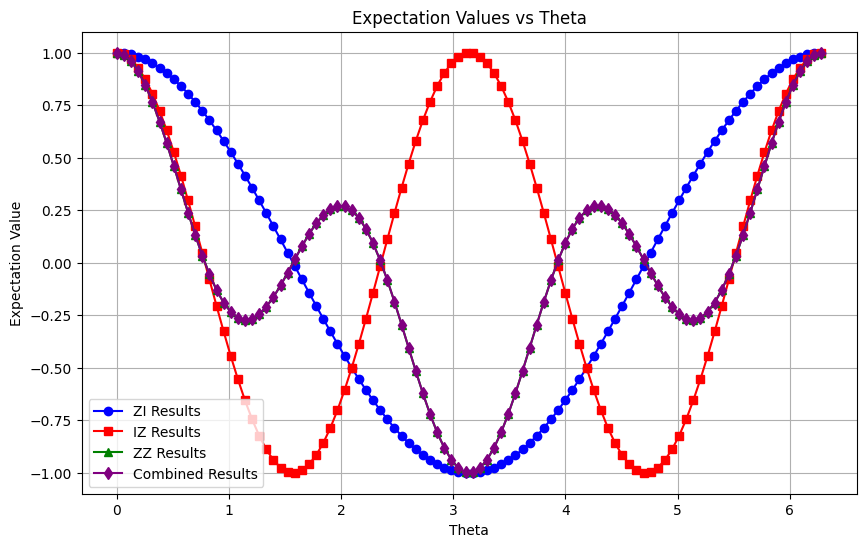

In [21]:
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def circuit_1(theta):
    """Implement the circuit and measure Z I and I Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float, float: The expectation values of the observables Z I, and I Z
    """
    ##################
    # YOUR CODE HERE #
    ##################

    qml.RX(theta, 0)
    qml.RY(2*theta, 1)

    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))


@qml.qnode(dev)
def circuit_2(theta):
    """Implement the circuit and measure Z Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float: The expectation value of the observable Z Z
    """

    ##################
    # YOUR CODE HERE #
    ##################

    qml.RX(theta, 0)
    qml.RY(2*theta, 1)

    return qml.expval(qml.PauliZ(0)@ qml.PauliZ(1))


def zi_iz_combination(ZI_results, IZ_results):
    """Implement a function that acts on the ZI and IZ results to
    produce the ZZ results. How do you think they should combine?

    Args:
        ZI_results (np.array[float]): Results from the expectation value of
            ZI in circuit_1.
        IZ_results (np.array[float]): Results from the expectation value of
            IZ in circuit_2.

    Returns:
        np.array[float]: A combination of ZI_results and IZ_results that
        produces results equivalent to measuring ZZ.
    """

    combined_results = np.zeros(len(ZI_results))

    ##################
    # YOUR CODE HERE #
    ##################

    combined_results = ZI_results * IZ_results
    
    return combined_results

theta = np.linspace(0, 2 * np.pi, 100)

def plotter(theta, ZI_results, IZ_results, ZZ_results, combined_results):
    """
    Plots the results of different experiments against the theta values.

    Args:
        theta (list or array): The theta values used in the experiments.
        ZI_results (list or array): The ZI results for each theta value.
        IZ_results (list or array): The IZ results for each theta value.
        ZZ_results (list or array): The ZZ results for each theta value.
        combined_results (list or array): The combined results for each theta value.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    
    # Plot each set of results
    plt.plot(theta, ZI_results, 'o-', label='ZI Results', color='blue')
    plt.plot(theta, IZ_results, 's-', label='IZ Results', color='red')
    plt.plot(theta, ZZ_results, '^-', label='ZZ Results', color='green')
    plt.plot(theta, combined_results, 'd-', label='Combined Results', color='purple')
    
    # Add labels and title
    plt.xlabel('Theta')
    plt.ylabel('Expectation Value')
    plt.title('Expectation Values vs Theta')
    plt.legend()
    plt.grid(True)
    plt.show()


# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])

# Plot your results
plot = plotter(theta, ZI_results, IZ_results, ZZ_results, combined_results)

# All Tied Up

## Codercise-I.12.1-Entangling Operations

In [22]:
num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def apply_cnot(basis_id):
    """Apply a CNOT to |basis_id>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The resulting state after applying CNOT|basis_id>.
    """

    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE CNOT

    qml.CNOT(wires = [0,1])
    return qml.state()

##################
# YOUR CODE HERE #
##################

# REPLACE THE BIT STRINGS VALUES BELOW WITH THE CORRECT ONES
cnot_truth_table = {"00": "00", "01": "01", "10": "11", "11": "10"}


# Run your QNode with various inputs to help fill in your truth table
print(apply_cnot(0))

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


## Codercise-I.12.2-Separable or Entangled?

In [23]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def apply_h_cnot():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT

    qml.Hadamard(0)
    qml.CNOT(wires = [0,1])

    return qml.state()


print(apply_h_cnot())

##################
# YOUR CODE HERE #
##################

# SET THIS AS 'separable' OR 'entangled' BASED ON YOUR OUTCOME
state_status = "entangled"

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


## Codercise-I.12.3-Controlled Rotations

In [24]:
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):
    """Implement the circuit above and return measurement outcome probabilities.

    Args:
        theta (float): A rotation angle
        phi (float): A rotation angle
        omega (float): A rotation angle

    Returns:
        np.array[float]: Measurement outcome probabilities of the 3-qubit
        computational basis states.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT AND RETURN MEASUREMENT PROBABILITIES

    qml.Hadamard(0)
    qml.CRX(theta, wires = [0,1])
    qml.CRY(phi, wires = [1,2])
    qml.CRZ(omega, wires = [2,0])

    return qml.probs(wires = [0, 1, 2])

theta, phi, omega = 0.1, 0.2, 0.3
print(controlled_rotations(theta, phi, omega))

[5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.98751041e-01 0.00000000e+00 1.23651067e-03 1.24480103e-05]


# We've Got It Under Control

## Codercise-I.13.1-The Imposter CZ

In [25]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4

## Criei esta funcao porque o tutorial tem a funcao mas não é exibida na corpo do texto
@qml.qnode(dev)
def prepare_states(phi, theta, omega):
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE STATE
    qml.RX(phi,wires=0)
    qml.RY(theta,wires=1)
    qml.RZ(omega,wires=1)

    return qml.state()

@qml.qnode(device=dev)
def true_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)
    
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE REGULAR CZ GATE HERE
    qml.CZ(wires=[0, 1])
    
    return qml.state()


@qml.qnode(dev)
def imposter_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)
    
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT CZ USING ONLY H AND CNOT
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=1)
    
    return qml.state()

print(f"ESTADO INICIAL {prepare_states(phi, theta, omega)}")

print(f"True CZ output state {true_cz(phi, theta, omega)}")
print(f"Imposter CZ output state {imposter_cz(phi, theta, omega)}")

ESTADO INICIAL [-0.04343853-0.33432911j -0.09706327+0.74705738j -0.22872685+0.0297179j
  0.51108945+0.06640456j]
True CZ output state [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Imposter CZ output state [1.+0.j 0.+0.j 0.+0.j 0.+0.j]


## Codercise-I.13.2-The SWAP Gate

In [26]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(dev)
def apply_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE REGULAR SWAP GATE HERE

    qml.SWAP(wires = [0,1])

    return qml.state()


@qml.qnode(dev)
def apply_swap_with_cnots(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE SWAP GATE USING A SEQUENCE OF CNOTS

    qml.CNOT(wires = [0,1])
    qml.CNOT(wires = [1,0])
    qml.CNOT(wires = [0,1])

    return qml.state()


print(f"Regular SWAP state = {apply_swap(phi, theta, omega)}")
print(f"CNOT SWAP state = {apply_swap_with_cnots(phi, theta, omega)}")

Regular SWAP state = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
CNOT SWAP state = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]


## Codercise-I.13.3-The Toffoli Gate

In [27]:
dev = qml.device("default.qubit", wires=3)

# Prepare first qubit in |1>, and arbitrary states on the second two qubits
phi, theta, omega = 1.2, 2.3, 3.4


# A helper function just so you can visualize the initial state
# before the controlled SWAP occurs.
@qml.qnode(dev)
def no_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)
    return qml.state()

@qml.qnode(dev)
def controlled_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # PERFORM A CONTROLLED SWAP USING A SEQUENCE OF TOFFOLIS

    qml.Toffoli(wires = [0,1,2])
    qml.Toffoli(wires = [0,2,1])
    qml.Toffoli(wires = [0,1,2])

    return qml.state()


print(no_swap(phi, theta, omega))
print(controlled_swap(phi, theta, omega))

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


## Codercise-I.13.4-Mixed Controlled Gates

In [28]:
dev = qml.device("default.qubit", wires=4)


@qml.qnode(dev)
def four_qubit_mcx():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT ABOVE USING A 4-QUBIT MULTI-CONTROLLED X

    qml.Hadamard(0)
    qml.Hadamard(1)
    qml.Hadamard(2)
    qml.MultiControlledX(control_wires = [0, 1, 2], wires = 3, control_values = "001")

    return qml.state()

print(four_qubit_mcx())

[0.35355339+0.j 0.        +0.j 0.        +0.j 0.35355339+0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j]


/mnt/DOWNLOADS/Physics/Quantum_Computing/WOMANIUM_QM+AI_2024/QC_Programmimg/project/Conspicuity-Detection-in-Production-by-QML/.venv/lib64/python3.12/site-packages/pennylane/ops/op_math/controlled_ops.py:1071: PennyLaneDeprecationWarning: Specifying control values using a bitstring is deprecated, and will not be supported in future releases, Use a list of booleans or integers instead.
  warnings.warn(
/mnt/DOWNLOADS/Physics/Quantum_Computing/WOMANIUM_QM+AI_2024/QC_Programmimg/project/Conspicuity-Detection-in-Production-by-QML/.venv/lib64/python3.12/site-packages/pennylane/ops/op_math/controlled_ops.py:1077: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


## Codercise-I.13.5-The 3-Controlled-NOT

In [29]:
# Wires 0, 1, 2 are the control qubits
# Wire 3 is the auxiliary qubit
# Wire 4 is the target
dev = qml.device("default.qubit", wires=5)


@qml.qnode(dev)
def four_qubit_mcx_only_tofs():
    # We will initialize the control qubits in state |1> so you can see
    # how the output state gets changed.
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.PauliX(wires=2)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT A 3-CONTROLLED NOT WITH TOFFOLIS

    qml.Toffoli(wires=[0,1,3])
    qml.Toffoli(wires=[2,3,4])
    qml.Toffoli(wires=[0,1,3])

    return qml.state()

print(four_qubit_mcx_only_tofs())

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j
 0.+0.j 0.+0.j]


# Multi-Qubit Gate Challenge

## Codercise-I.14.1-The Bell States

In [30]:
dev = qml.device("default.qubit", wires=2)

# Starting from the state |00>, implement a PennyLane circuit
# to construct each of the Bell basis states.


@qml.qnode(dev)
def prepare_psi_plus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE (1/sqrt(2)) (|00> + |11>)

    qml.Hadamard(0)
    qml.CNOT(wires = [0,1])

    return qml.state()


@qml.qnode(dev)
def prepare_psi_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE (1/sqrt(2)) (|00> - |11>)

    qml.PauliX(0)
    qml.Hadamard(0)
    qml.CNOT(wires = [0,1])

    return qml.state()


@qml.qnode(dev)
def prepare_phi_plus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE  (1/sqrt(2)) (|01> + |10>)

    qml.Hadamard(0)
    qml.PauliX(1)
    qml.CNOT(wires = [0,1])

    return qml.state()


@qml.qnode(dev)
def prepare_phi_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE  (1/sqrt(2)) (|01> - |10>)

    qml.PauliX(1)
    qml.PauliX(0)
    qml.Hadamard(0)
    qml.CNOT(wires = [0, 1])

    return qml.state()

psi_plus = prepare_psi_plus()
psi_minus = prepare_psi_minus()
phi_plus = prepare_phi_plus()
phi_minus = prepare_phi_minus()

# Uncomment to print results
print(f"|ψ_+> = {psi_plus}")
print(f"|ψ_-> = {psi_minus}")
print(f"|ϕ_+> = {phi_plus}")
print(f"|ϕ_-> = {phi_minus}")

|ψ_+> = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
|ψ_-> = [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
|ϕ_+> = [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
|ϕ_-> = [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]


## Codercise-I.14.2-Quantum Multiplexer

In [31]:
dev = qml.device("default.qubit", wires=3)

# State of first 2 qubits
state = [0, 1]

@qml.qnode(device=dev)
def apply_control_sequence(state):
    # Set up initial state of the first two qubits
    if state[0] == 1:
        qml.PauliX(wires=0)
    if state[1] == 1:
        qml.PauliX(wires=1)

    # Set up initial state of the third qubit - use |->
    # so we can see the effect on the output
    qml.PauliX(wires=2)
    qml.Hadamard(wires=2)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE MULTIPLEXER
    # IF STATE OF FIRST TWO QUBITS IS 01, APPLY X TO THIRD QUBIT
    qml.PauliX(0)
    qml.Toffoli(wires=[0,1,2])
    qml.PauliX(0)
    
    # IF STATE OF FIRST TWO QUBITS IS 10, APPLY Z TO THIRD QUBIT
    qml.PauliX(1)
    qml.Hadamard(2)
    qml.Toffoli(wires=[0,1,2])
    qml.PauliX(1)
    qml.Hadamard(2)
    
    # IF STATE OF FIRST TWO QUBITS IS 11, APPLY Y TO THIRD QUBIT
    qml.adjoint(qml.S)(2)
    qml.Toffoli(wires=[0,1,2])
    qml.S(2)

    return qml.state()

print(apply_control_sequence(state))

[ 0.        +0.j  0.        +0.j -0.70710678+0.j  0.70710678+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
